## Valeria Pérez Cong
## 145009
## Noviembre 2, 2017

-Train a logistic regression for the AND and XOR problems using Tensorflow

-Train a ANN for the XOR problem and create a visualization that enables you to visualize the decision boudaries

-Train a ANN that identifies points inside a circle (generate the data yourself). Experiment with the number of neurons in the intermediate layer

Optional: Plot the error vs the model complexity

# El problema del círculo

In [46]:
import tensorflow as tf

import os
import io
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from scipy.stats import norm
from sklearn import preprocessing
from random import random
import math
from sklearn import datasets, linear_model

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline


In [111]:
##Para generar los datos se utilizó R Studio
#x<-runif(1500, -2, 2)
#y <- runif(1500, -2, 2)
#r <- 1
#target <- ifelse(sqrt(x^2+y^2) <= r^2, 1,0)
#data_set <- data.frame(x=x, y=y,target=target)

circle=pd.read_csv("/Users/valeriaperezcong/Desktop/ITAM/9/aprendizaje/udemy/DataScience-Python3/DeepLearning/circle_data.csv")

In [112]:
circle.describe()

,x,y,target
count,1500.000000,1500.000000,1500.000000
mean,0.025768,-0.010534,0.180667
std,1.180886,1.154959,0.384870
min,-1.999495,-1.997327,0.000000
25%,-1.018630,-1.011903,0.000000
50%,0.010652,-0.041783,0.000000
75%,1.090813,1.020028,0.000000
max,1.999295,1.999903,1.000000


Para poder entrenar la red neuronal, generamos 1500 numeros aleatorios para x y y. Si x^2 + y^2<=1^2 la variable target es 1 (es decir, el punto x y sí está dentro del círculo) y 0 en otro caso. 

In [113]:
col_x= circle.ix[:,0]
col_y=circle.ix[:,1]
target=circle.ix[:,2]

In [115]:
X=[]
Y=[]

for i in range (0,1500):
    X.append([col_x[i],col_y[i]])

for j in range (0,1500):
    Y.append([target[j]])
    


In [116]:
X=np.asarray(X)
Y=np.asarray(Y)


In [117]:
input_size = 2
output_layer_size = 1
input_data= tf.placeholder(tf.float32,[None, input_size])

target = tf.placeholder(tf.float32,[None, output_layer_size])

In [132]:
hidden_nodes=2
#hold weights and biases between each training run 
#2,2
input_weights=tf.Variable(tf.random_uniform([input_size,hidden_nodes],-1,1),name="input_weights")
input_biases= tf.Variable(tf.zeros([hidden_nodes]),name="input_biases")

hidden_weights= tf.Variable(tf.random_uniform([input_size,hidden_nodes],-1,1),name="hidden_weights")
hidden_biases=tf.Variable(tf.zeros([hidden_nodes]),name="hidden_biases")

In [133]:
#nuestra capa de input es una multiplicacion matricial entre 
#los datos de entrada y sus respectivos pesos
#aquí estamos poniendo las conexiones entre las capas
input_layer=tf.matmul(input_data,input_weights)
hidden_layer=tf.nn.sigmoid(input_layer+input_biases)
#digit_weights
output_layer=tf.nn.sigmoid(tf.matmul(hidden_layer,hidden_weights)+hidden_biases)

In [134]:
#para medir qué tan correctos fueron nuestros resultados 
# usamos softmax_cross_entropy para penalizar más rápido los errores
loss_function=tf.reduce_mean(tf.reduce_sum((target-output_layer)**2))

In [135]:
optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss_function)

In [136]:
#evaluate 
correct_prediction = tf.equal(tf.argmax(output_layer,1), tf.argmax(target,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

## Corremos la red

In [137]:
init=tf.global_variables_initializer()
sess=tf.Session()

#corremos 5000 training steps
sess.run(init)
for i in range(15000):
    sess.run(optimizer, feed_dict={input_data: X, target: Y})
    

In [138]:
correct_prediction = tf.equal(tf.round(output_layer),target)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={input_data: X, target: Y})) 

0.819333


Podemos ver que el modelo tiene una accuracy del 81.93% 

# El problema de AND y XOR

## AND

In [147]:
#-Train a logistic regression for the AND and XOR problems using Tensorflow

#-Train a ANN for the XOR problem and create a visualization that enables you to visualize the decision boudaries

X_and=np.asarray([[0,0],[0,1],[1,0],[1,1]])
Y_and=np.asarray([[0],[0],[0],[1]])

input_size_and = 2
output_layer_size_and = 1

input_data_and= tf.placeholder(tf.float32,[None, input_size])

target_and = tf.placeholder(tf.float32,[None, output_layer_size])

#hold weights and biases between each training run 
#2,2
input_weights_and=tf.Variable(tf.random_uniform([input_size_and,output_layer_size_and],-1,1),name="input_weights_and")
input_biases_and= tf.Variable(tf.zeros([output_layer_size_and]),name="input_biases_and")

#nuestra capa de input es una multiplicacion matricial entre 
#los datos de entrada y sus respectivos pesos
#aquí estamos poniendo las conexiones entre las capas
input_layer_and=tf.matmul(input_data_and,input_weights_and)
output_layer_and=tf.nn.sigmoid(input_layer_and+input_biases_and)
#digit_weights

#para medir qué tan correctos fueron nuestros resultados 
# usamos softmax_cross_entropy para penalizar más rápido los errores
loss_function_and=tf.reduce_mean(tf.reduce_sum((target_and-output_layer_and)**2))

optimizer_and = tf.train.GradientDescentOptimizer(0.5).minimize(loss_function_and)

init_and = tf.global_variables_initializer()
sess_and = tf.Session()

In [149]:
sess_and.run(init_and)
for a in range(2500):
    sess_and.run(optimizer_and, feed_dict={input_data_and: X_and, target_and: Y_and})

In [153]:
w=[sess_and.run(input_biases_and, feed_dict={input_data_and: X_and, target_and: Y_and})[0]]+[i[0] for i in sess_and.run(input_weights_and, feed_dict={ input_data_and: X_and, target_and: Y_and})]

m=((w[0]/w[2]))/((-w[0]/w[1])) #cambios en la pendiente 

print (-1.0*w[0]/w[1], -1.0*w[0]/w[2], m)

1.51366429919 1.51366429919 -1.0


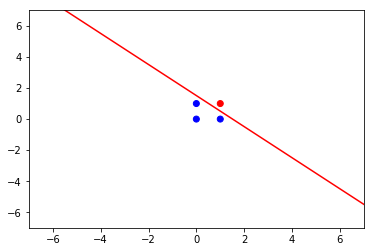

In [154]:
plt.scatter(X_and[:,0],X_and[:,1],c=['red' if i==1 else 'blue' for i in Y_and])
x2 = np.linspace(-7,7,100)
plt.plot(x2,-w[0]/w[2]+m*x2,color='red')
plt.ylim([-7,7])
plt.xlim([-7,7])
plt.show()

## XOR

In [155]:
#-Train a logistic regression for the AND and XOR problems using Tensorflow

#-Train a ANN for the XOR problem and create a visualization that enables you to visualize the decision boudaries

X_xor=np.asarray([[0,0],[0,1],[1,0],[1,1]])
Y_xor=np.asarray([[0],[1],[1],[0]])

input_size_xor = 2
output_layer_size_xor = 1

input_data_xor= tf.placeholder(tf.float32,[None, input_size_xor])

target_xor = tf.placeholder(tf.float32,[None, output_layer_size_xor])

#hold weights and biases between each training run 
#2,2
input_weights_xor=tf.Variable(tf.random_uniform([input_size_xor,output_layer_size_xor],-1,1),name="input_weights_xor")
input_biases_xor= tf.Variable(tf.zeros([output_layer_size_xor]),name="input_biases_xor")

#nuestra capa de input es una multiplicacion matricial entre 
#los datos de entrada y sus respectivos pesos
#aquí estamos poniendo las conexiones entre las capas
input_layer_xor=tf.matmul(input_data_xor,input_weights_xor)
output_layer_xor=tf.nn.sigmoid(input_layer_xor+input_biases_xor)
#digit_weights

#para medir qué tan correctos fueron nuestros resultados 
# usamos softmax_cross_entropy para penalizar más rápido los errores
loss_function_xor=tf.reduce_mean(tf.reduce_sum((target_xor-output_layer_xor)**2))

optimizer_xor = tf.train.GradientDescentOptimizer(0.5).minimize(loss_function_xor)

init_xor = tf.global_variables_initializer()
sess_xor = tf.Session()

In [157]:
sess_xor.run(init_xor)
for a in range(2500):
    sess_xor.run(optimizer_xor, feed_dict={input_data_xor: X_xor, target_xor: Y_xor})

In [158]:
w_xor=[sess_xor.run(input_biases_xor, feed_dict={input_data_xor: X_xor, target_xor: Y_xor})[0]]+[i[0] for i in sess_xor.run(input_weights_xor, feed_dict={ input_data_xor: X_xor, target_xor: Y_xor})]

m_xor=((w_xor[0]/w_xor[2]))/((-w_xor[0]/w_xor[1]))#cambio en la pendiente

print (-1.0*w_xor[0]/w_xor[1], -1.0*w_xor[0]/w_xor[2], m_xor)

0.6875 0.6875 -1.0


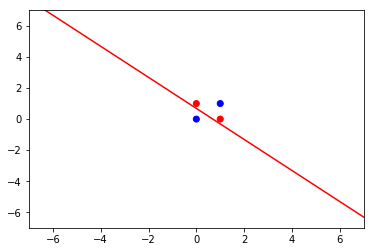

In [159]:
plt.scatter(X_xor[:,0],X_xor[:,1],c=['red' if i==1 else 'blue' for i in Y_xor])
x2_xor = np.linspace(-7,7,100) # 100 numeros espaciados
plt.plot(x2_xor,-w_xor[0]/w_xor[2]+m_xor*x2_xor,color='red')
plt.ylim([-7,7])
plt.xlim([-7,7])
plt.show()